In [1]:
%config Completer.use_jedi = False                                       
import warnings                                                             
warnings.filterwarnings(action="ignore")
import numpy as np
import pandas as pd                                                         
import matplotlib.pyplot as plt                                            
import matplotlib as mpl                                                    
mpl.rcParams['axes.unicode_minus'] = False                                  
#plt.rcParams('font.family') = 'RIDIBatang'                          
#plt.rcParams('font.size') = 16                                             
import matplotlib.font_manager as fm
font = 'C:\\Windows\\Fonts\\RIDIBatang.otf'
fontprop = fm.FontProperties(fname=font, size=16).get_name()
plt.rc('font', family = 'RIDIBatang')
plt.rc('font', size = 16)
import seaborn as sns                                                       
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

***
주성분 분석(PCA; Principal Component Analysis)
***
차원(피쳐의 갯수)을 줄이면서도 데이터가 퍼져있는 정도(분산)는 최대한 유지하게 만들어  
고차원 데이터를 저차원 데이터로 차원을 축소하는 알고리즘을 말한다.  
주로 고차원 데이터를 3차원 이하의 데이터로 바꿔 시각화하는데 많이 사용되며, 유용한 정보만 살려 적은 메모리 적용하거나 노이즈(잡음)을 줄이고 싶을 때도 사용되는 알고리즘이다.  

<img src="./주성분분석 (4).png">
<img src="./주성분분석 (3).png">
<img src="./주성분분석 (2).png">
<img src="./주성분분석 (1).png">

***
임의의 dataset을 만든다.
***

In [2]:
datas = np.array([[5 + x, 5 * (np.sqrt(1 / 3) + 0.1 * np.random.normal(0, 1)) * x] for x in np.random.normal(0, 1, 30)])
print(datas)
print('*' * 100)
n_datas = datas - np.mean(datas, axis=0)
print(n_datas)

[[ 4.97838485 -0.07401386]
 [ 5.29507847  0.98372848]
 [ 5.7070917   2.55132949]
 [ 5.64198472  2.13405031]
 [ 6.8099415   4.99844052]
 [ 3.94551869 -3.3871877 ]
 [ 5.29618588  0.7535905 ]
 [ 5.34410607  0.83572982]
 [ 4.86039588 -0.46500471]
 [ 5.37106091  1.13258056]
 [ 3.97837563 -3.14746727]
 [ 5.24832574  0.75485944]
 [ 4.46974391 -1.54835752]
 [ 4.84893464 -0.3843745 ]
 [ 5.33437961  0.64243263]
 [ 6.79158035  6.00917916]
 [ 3.61589515 -3.62262695]
 [ 4.34112371 -2.08860379]
 [ 3.88149491 -2.62638151]
 [ 5.28191313  0.6632101 ]
 [ 6.1645644   3.5638709 ]
 [ 5.18160779  0.68546101]
 [ 4.33529102 -1.7473458 ]
 [ 5.45933104  1.59621617]
 [ 6.42825338  3.47093175]
 [ 5.58525544  1.9344931 ]
 [ 5.03367685  0.08387144]
 [ 2.99627886 -5.35283167]
 [ 3.97616539 -2.84800555]
 [ 4.00919723 -3.23057736]]
****************************************************************************************************
[[-0.02865305 -0.14972044]
 [ 0.28804057  0.90802191]
 [ 0.70005381  2.47562292]
 [ 0.63

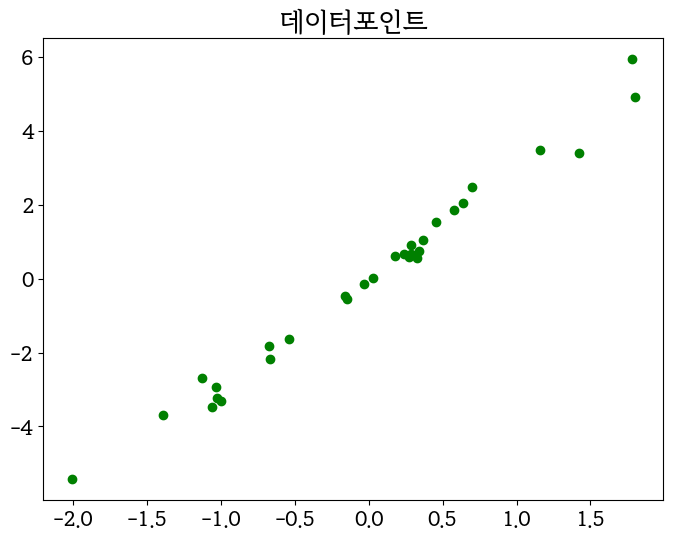

In [3]:
plt.figure(figsize=[8,6])
plt.plot(n_datas[:, 0], n_datas[:, 1], 'og')
plt.title('데이터포인트')
#plt.axis('equal') # 각 축의 범위와 스케일을 동일하게 설정한다. 
plt.show()

***
행렬 내적
***

In [4]:
# 행렬 내적
A = np.array([[1, 2], [3, 4]])
print('A\n', A, sep=' ')
B = np.array([[1, -2], [2, 3]])
print('B\n', B, sep=' ')
print('------------')

print('AB\n', np.dot(A,B), sep=' ')
print('AB\n', np.matmul(A,B), sep=' ')
print('AB\n', A @ B, sep=' ') # @ -> numpy 배열 내적 연산자

A
 [[1 2]
 [3 4]]
B
 [[ 1 -2]
 [ 2  3]]
------------
AB
 [[ 5  4]
 [11  6]]
AB
 [[ 5  4]
 [11  6]]
AB
 [[ 5  4]
 [11  6]]


***
벡터 내적
***
x축으로 사영하면 y좌표는 무시되고, x좌표만 남는다

In [5]:
#print(np.array([1, 0])) #1행만 존재하므로 행 벡터이다.
# 30행 2열인 2차원 배열을 행 벡터 [1, 0]와 내적하면 결과는 데이터가 30개인 1차원 배열이 된다.
#print(np.dot(n_datas, np.array([1, 0])))
proj_xaxis = np.dot(n_datas, np.array([1, 0]))
#print(proj_xaxis)
#reshape(-1, n) -> 열 갯수는 n개로 고정하고, 행은 상황에 따라 적절히 만든다. 
# 데이터가 30개인  1차원 배열에 reshape(-1, n)를 실행하면 30행 1열인 2차원 배열이 된다.
#print(proj_xaxis.reshape(-1, 1))
proj_xaxis2 = np.dot(proj_xaxis.reshape(-1, 1), np.array([[1, 0]]))
#print(proj_xaxis2)

In [6]:
#print(np.array([1, 0]).reshape(2, 1)) #1열 2열로 만들어서 reshape() 메소드로 2행 1열로 변환, 1열만 존재하므로 열 벡터이다.
proj_xaxis = np.dot(n_datas, np.array([1, 0]).reshape(2, 1))
#print(proj_xaxis)
proj_xaxis2 = np.dot(proj_xaxis, np.array([[1, 0]]))
pd.DataFrame(proj_xaxis2)

,0,1
0,-0.028653,-0.0
1,0.288041,0.0
2,0.700054,0.0
3,0.634947,0.0
4,1.802904,0.0
5,-1.061519,-0.0
6,0.289148,0.0
7,0.337068,0.0
8,-0.146642,-0.0
9,0.364023,0.0


In [7]:
#print(np.array([[1], [2]]))
proj_xaxis = np.dot(n_datas, np.array([[1], [0]]))
#print(proj_xaxis)
proj_xaxis2 = np.dot(proj_xaxis, np.array([[1, 0]]))
#print(proj_xaxis2)

In [8]:
proj_xaxis = np.dot(n_datas, np.array([1, 0]))
print(proj_xaxis)

[-0.02865305  0.28804057  0.70005381  0.63494682  1.80290361 -1.0615192
  0.28914798  0.33706817 -0.14664201  0.36402302 -1.02866226  0.24128785
 -0.53729399 -0.15810325  0.32734171  1.78454246 -1.39114274 -0.66591418
 -1.12554299  0.27487523  1.15752651  0.17456989 -0.67174688  0.45229315
  1.42121548  0.57821754  0.02663896 -2.01075904 -1.0308725  -0.99784066]


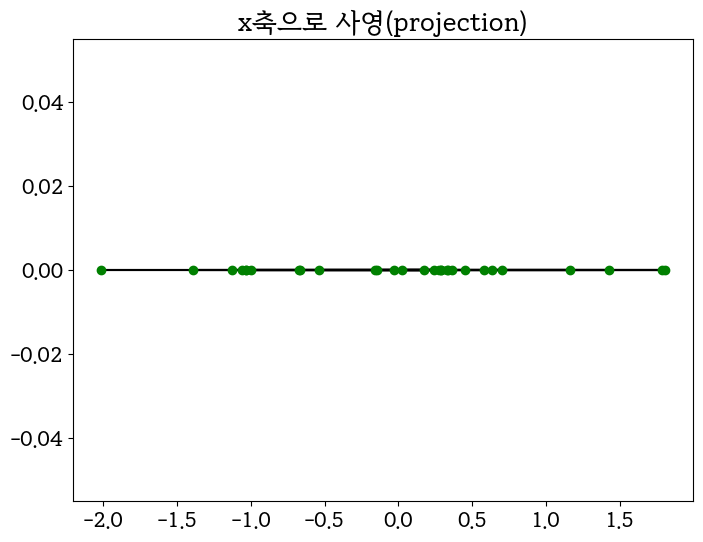

In [9]:
plt.figure(figsize=[8,6])
plt.plot(proj_xaxis2[:, 0], proj_xaxis2[:, 1], 'black')
plt.plot(proj_xaxis2[:, 0], proj_xaxis2[:, 1], 'og')
plt.title('x축으로 사영(projection)')
#plt.axis('equal') # 각 축의 범위와 스케일을 동일하게 설정한다. 
plt.show()

***
x축으로 사영하면 y좌표는 무시되고, x좌표만 남는다
***

In [10]:
proj_xaxis = np.dot(n_datas, np.array([0, 1]))
proj_xaxis2 = np.dot(proj_xaxis.reshape(-1, 1), np.array([[0, 1]]))
print(proj_xaxis2)

[[-0.         -0.14972044]
 [ 0.          0.90802191]
 [ 0.          2.47562292]
 [ 0.          2.05834374]
 [ 0.          4.92273395]
 [-0.         -3.46289428]
 [ 0.          0.67788393]
 [ 0.          0.76002325]
 [-0.         -0.54071128]
 [ 0.          1.05687399]
 [-0.         -3.22317384]
 [ 0.          0.67915286]
 [-0.         -1.62406409]
 [-0.         -0.46008107]
 [ 0.          0.56672606]
 [ 0.          5.93347258]
 [-0.         -3.69833352]
 [-0.         -2.16431037]
 [-0.         -2.70208808]
 [ 0.          0.58750353]
 [ 0.          3.48816433]
 [ 0.          0.60975443]
 [-0.         -1.82305237]
 [ 0.          1.5205096 ]
 [ 0.          3.39522517]
 [ 0.          1.85878653]
 [ 0.          0.00816487]
 [-0.         -5.42853824]
 [-0.         -2.92371212]
 [-0.         -3.30628394]]


In [11]:
proj_xaxis = np.dot(n_datas, np.array([0, 1]).reshape(2, 1))
#print(proj_xaxis)
proj_xaxis2 = np.dot(proj_xaxis, np.array([[0, 1]]))
pd.DataFrame(proj_xaxis2)

,0,1
0,-0.0,-0.149720
1,0.0,0.908022
2,0.0,2.475623
3,0.0,2.058344
4,0.0,4.922734
5,-0.0,-3.462894
6,0.0,0.677884
7,0.0,0.760023
8,-0.0,-0.540711
9,0.0,1.056874


In [12]:
proj_xaxis = np.dot(n_datas, np.array([[0], [1]]))
proj_xaxis2 = np.dot(proj_xaxis, np.array([[0, 1]]))
#print(proj_xaxis2)

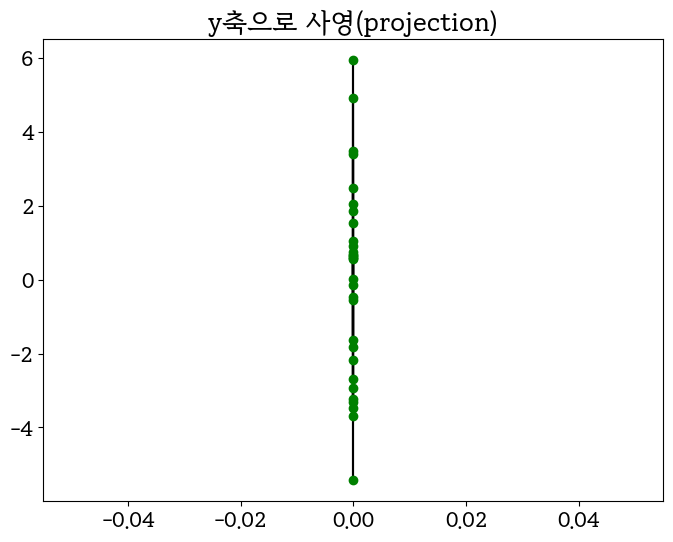

In [13]:
plt.figure(figsize=[8,6])
plt.plot(proj_xaxis2[:, 0], proj_xaxis2[:, 1], 'black')
plt.plot(proj_xaxis2[:, 0], proj_xaxis2[:, 1], 'og')
plt.title('y축으로 사영(projection)')
#plt.axis('equal') # 각 축의 범위와 스케일을 동일하게 설정한다. 
plt.show()

***
데이터를 특정 선 위로 사영한다.
***

In [14]:
print( np.array([np.cos(np.pi / 6), np.sin(np.pi / 6)]))
prop_line = np.dot(n_datas, np.array([np.cos(np.pi / 6), np.sin(np.pi / 6)]))
print(prop_line)
prop_line2 = np.dot(prop_line.reshape(-1, 1), np.array([[np.cos(np.pi / 6), np.sin(np.pi / 6)]]))
print(prop_line2)

[0.8660254 0.5      ]
[-0.09967448  0.70346141  1.84407584  1.57905195  4.0227273  -2.65074974
  0.58935147  0.67192122 -0.39735135  0.84369017 -2.50243457  0.54853784
 -1.27734229 -0.36696197  0.56684927  4.51219539 -3.05393172 -1.65885378
 -2.32579286  0.5318007   2.74652952  0.45605918 -1.49327605  1.15195215
  2.9284213   1.43014435  0.02715245 -4.45563753 -2.35461784 -2.51729733]
[[-0.08632063 -0.04983724]
 [ 0.60921545  0.3517307 ]
 [ 1.59701652  0.92203792]
 [ 1.3674991   0.78952597]
 [ 3.48378403  2.01136365]
 [-2.29561661 -1.32537487]
 [ 0.51039334  0.29467573]
 [ 0.58190085  0.33596061]
 [-0.34411636 -0.19867567]
 [ 0.73065712  0.42184509]
 [-2.16717191 -1.25121729]
 [ 0.4750477   0.27426892]
 [-1.10621087 -0.63867114]
 [-0.31779839 -0.18348098]
 [ 0.49090586  0.28342463]
 [ 3.90767584  2.2560977 ]
 [-2.64478245 -1.52696586]
 [-1.43660952 -0.82942689]
 [-2.0141957  -1.16289643]
 [ 0.46055291  0.26590035]
 [ 2.37856434  1.37326476]
 [ 0.39495883  0.22802959]
 [-1.29321499 -0.7

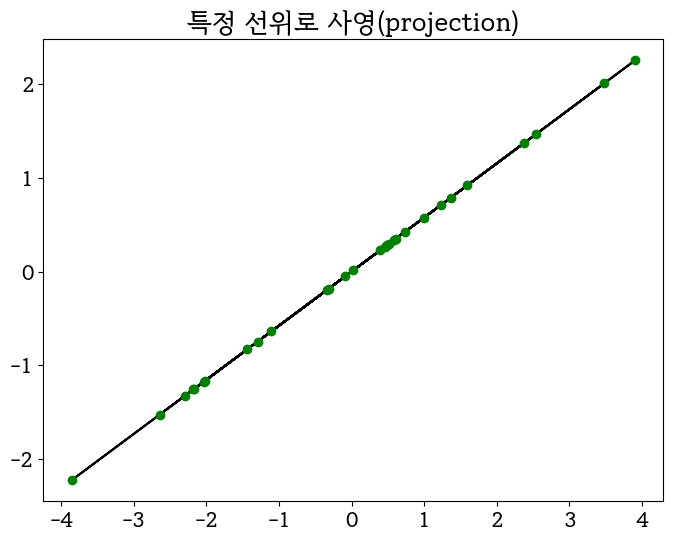

In [15]:
plt.figure(figsize=[8,6])
plt.plot(prop_line2[:, 0], prop_line2[:, 1], 'black')
plt.plot(prop_line2[:, 0], prop_line2[:, 1], 'og')
plt.title('특정 선위로 사영(projection)')
#plt.axis('equal') # 각 축의 범위와 스케일을 동일하게 설정한다. 
plt.show()

In [16]:
# 표준편차가 큰 것이 데이터 과학 입장에서는 데이터의 분포를 잘 보존하고 있다고 생각할 수 있다.
# 임의로 설정한 선의 표준편차가 가장 크므로 X축이나 Y축보다는 임의의 선으로 정사영하는 것이 좋다.
print(np.std(proj_xaxis)) # X축으로 위로 사영
print(np.std(proj_xaxis2)) # Y축으로 위로 사영
print(np.std(prop_line)) # 임의로 설정한 특정 선으로 사영

2.6282107471108227
1.8584256416694251
2.0953982796097215


***
공분산(Covariance)
***
두 집단간 상호 연관성(상관 관계)을 측정하는 도구로 X에서 X의 기댓값(평균)을 뺀 편차에서 Y에서 Y의 기댓값을 뺀 편차의 제곱에 대한 기댓값으로 계산한다.  

$$E((X - E(X))(Y - E(Y))$$


$x = \{x_1, x_2, \ldots, x_n\}$이고 $y = \{y_1, y_2, \ldots, y_n\}$일 때 $x$와 $y$의 공분산은 아래와 같이 계산한다. 
  
$$\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu_x)(y_i - \mu_y) $$  

$n-1$로 계산하는 이유는 표본에 대한 분산이기 때문이다.  모집단에 대해서 공분산을 계산할 때에에는 $n$으로 계산한다.  

$Z = \begin{bmatrix} x_1 & x_2 & \cdots x_n \\ y_1 & y_2 & \cdots y_n \end{bmatrix}$ 이고  $\mu_x = \mu_y=0$일 경우 공분산 행렬은 $\Sigma =\begin{bmatrix} {\rm Var}(x) & {\rm Cov}(x,y) \\ {\rm Cov}(y,x) & {\rm Var}(y) \end{bmatrix}$와 같이 계산할 수 있고 $ ZZ^T = \begin{bmatrix} \langle x, x\rangle  &\langle x, y \rangle \\ \langle y, x \rangle &\langle y, y \rangle \end{bmatrix}$와 비례한다.

In [17]:
print(n_datas.T @ n_datas / 29)
# ddof(Delta Degrees of Freedom, 자유도)는 0이면 N으로 나누는 것이고, 1이면 (n-1)로 나누는 것이다.
print(np.var(n_datas[:, 0], ddof=1)) # x의 분산
print(np.var(n_datas[:, 1], ddof=1)) # y의 분산
# numpy의 cov() 메소드로 공분산 행렬을 계산할 수 있다. 
print(np.cov(n_datas.T, ddof=1))

[[0.8493465  2.44642597]
 [2.44642597 7.1456811 ]]
0.8493465018095527
7.145681101271201
[[0.8493465  2.44642597]
 [2.44642597 7.1456811 ]]


***
PCA 예제_1
***

In [18]:
sigma = n_datas.T @ n_datas / 29 # 공분산 행렬
#print(sigma)
# numpy의 linalg.eig() 메소드는 공분산 행렬을 인수로 넘겨받아 고유값과 고유 벡터로 이루어진 행렬을 계산해 리턴한다.
las, evs = np.linalg.eig(sigma)
print(las) #고유값, 피쳐가 2개이기 때문에 고유값이 2개가 나온다.
# 고유 벡터 행렬의 첫번째 열 벡터가 첫번쨰 고유값에, 두번째 열 벡터가 두번째 고유값에 대응된다.
# 원래 특성의 X값에 열 벡터의 첫번째 값을 곱하고 y값에 열 벡터의 두번째 값을 곱한 특성을 새로운 특성으로 사용하면
# 데이터의 분포를 거의 유지하면서 1차원으로 데이터를 나타낼 수 있다는 의미이다.
print(evs) #고유 벡터 행렬

[0.01054034 7.98448726]
[[-0.9459422  -0.32433524]
 [ 0.32433524 -0.9459422 ]]


In [19]:
u1 = evs[:, 0] #첫번째 특성 벡터, X축
print(u1)
proj_ul = np.dot(n_datas, u1) #원래 데이터와 첫번째 특성 벡터의 내적
print(proj_ul)

[-0.9459422   0.32433524]
[-0.02145549  0.02203377  0.14072131  0.06697041 -0.10882653 -0.11900282
 -0.05365564 -0.07234469 -0.03665685 -0.00156326 -0.07233381 -0.00797116
 -0.01849216  0.00033604 -0.12583711  0.23636022  0.11644075 -0.07204579
  0.18831623 -0.06946798  0.03638143  0.03263182  0.0441536   0.06531167
 -0.24319654  0.0559096  -0.02255076  0.1413956   0.02688294 -0.12844479]


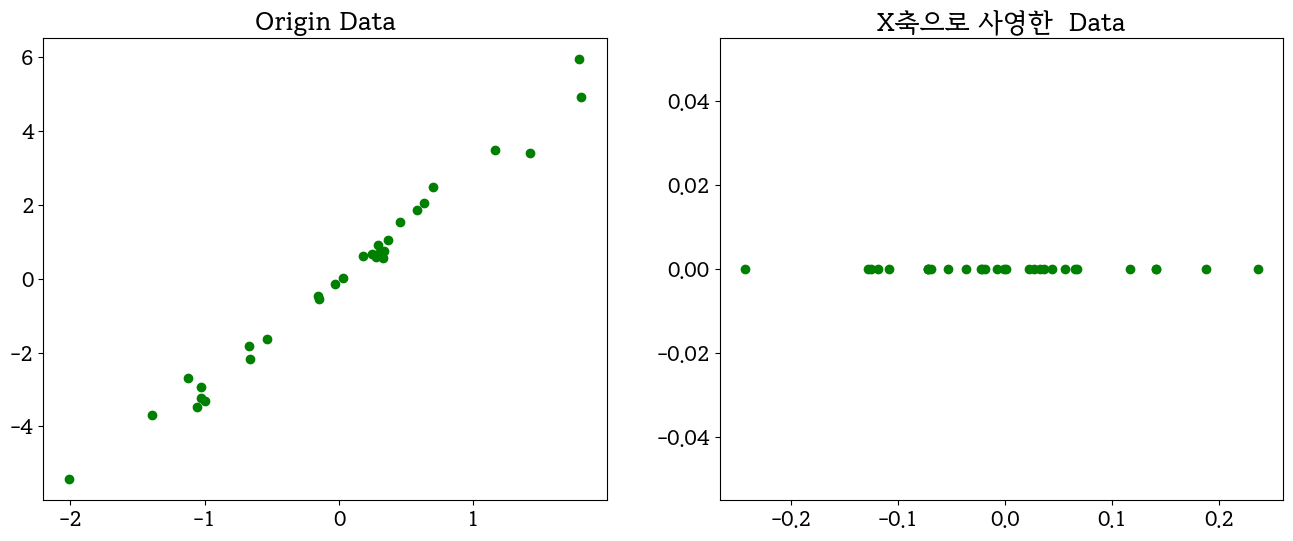

In [20]:
plt.figure(figsize=[16,6])
plt.subplot(1, 2, 1)
plt.plot(n_datas[:, 0], n_datas[:, 1], 'og')
plt.title('Origin Data')
#plt.axis('equal') 

plt.subplot(1, 2, 2)
plt.plot(proj_ul, np.zeros_like(proj_ul), 'og')
plt.title('X축으로 사영한  Data')
#plt.axis('equal') 


plt.show()

In [21]:
u2 = evs[:, 1] #두번째 특성 벡터, Y축
print(u2)
proj_u2 = np.dot(n_datas, u2) #원래 데이터와 두번째 특성 벡터의 내적
print(proj_u2)

[-0.32433524 -0.9459422 ]
[ 0.15092007 -0.95235795 -2.56884831 -2.15300984 -5.24136697  3.61998593
 -0.7350199  -0.82826115  0.55904279 -1.1178072   3.38256759 -0.72069751
  1.71053414  0.48648856 -0.64225855 -6.19151213  3.94960638  2.26329195
  2.92107241 -0.64489611 -3.67502849 -0.63341162  1.94237336 -1.58500881
 -3.67263705 -1.94584095 -0.01636345  5.78724344  3.10001097  3.4511884 ]


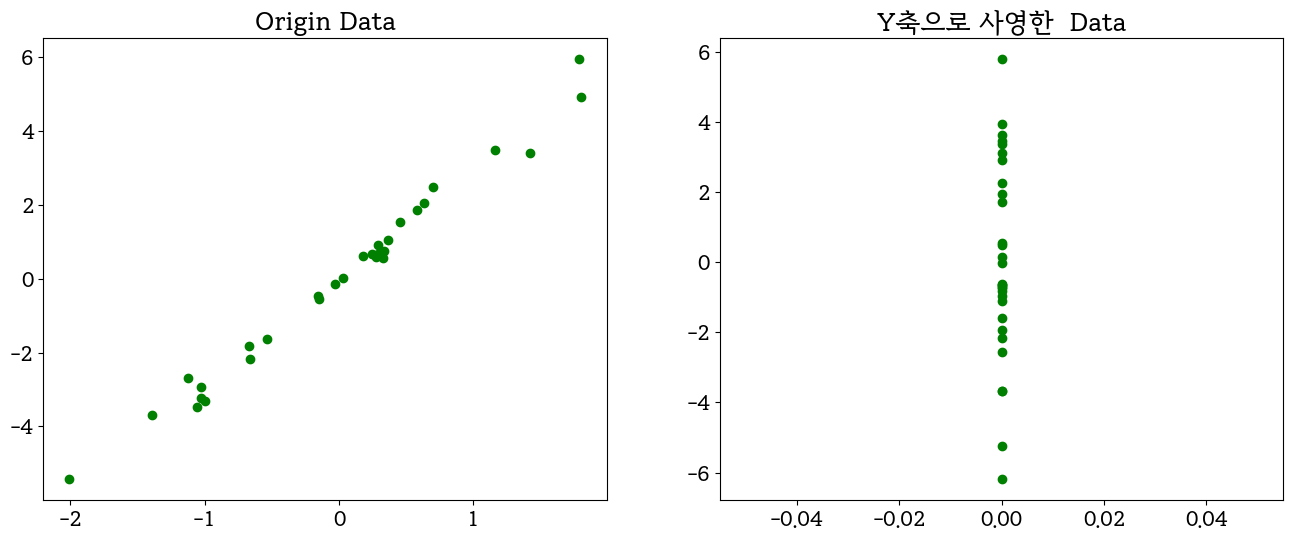

In [22]:
plt.figure(figsize=[16,6])
plt.subplot(1, 2, 1)
plt.plot(n_datas[:, 0], n_datas[:, 1], 'og')
plt.title('Origin Data')
#plt.axis('equal') 

plt.subplot(1, 2, 2)
plt.plot(np.zeros_like(proj_u2), proj_u2, 'og')
plt.title('Y축으로 사영한  Data')
#plt.axis('equal') 


plt.show()

In [23]:
u1 = evs[:, 0] #첫번째 특성 벡터, X축
u2 = evs[:, 1] #두번째 특성 벡터, Y축
proj_ul = np.dot(n_datas, u1) #원래 데이터와 첫번째 특성 벡터의 내적
proj_u2 = np.dot(n_datas, u2) #원래 데이터와 두번째 특성 벡터의 내적

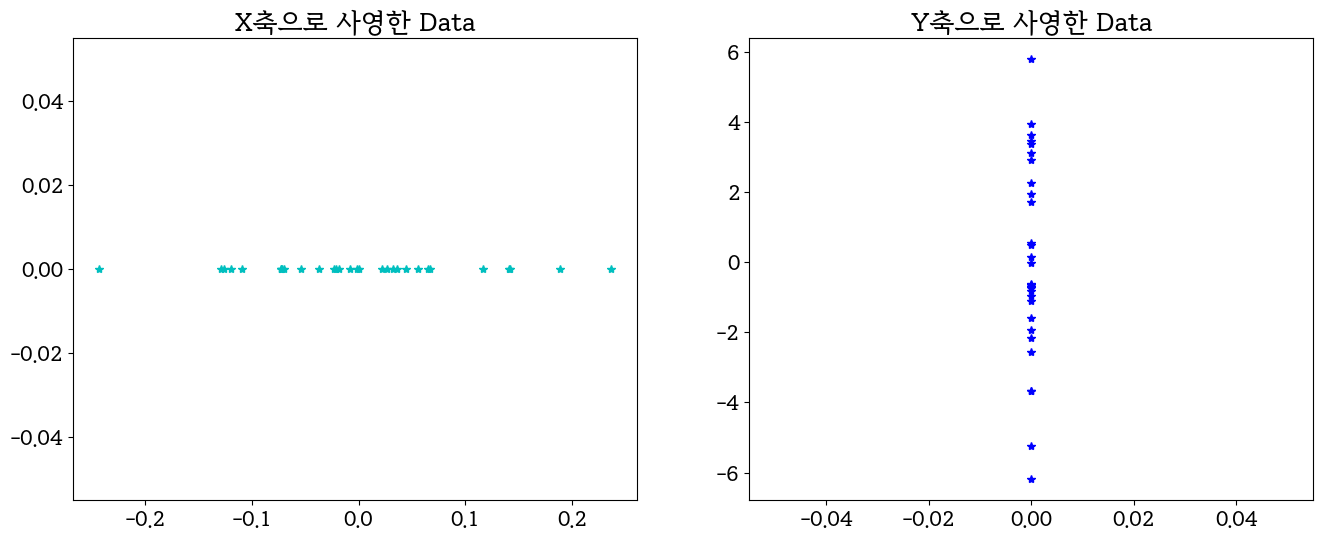

In [24]:

plt.figure(figsize=[16,6])
plt.subplot(1, 2, 1)
plt.plot(proj_ul, np.zeros_like(proj_ul), '*c')
plt.title('X축으로 사영한 Data')
#plt.axis('equal') 

plt.subplot(1, 2, 2)
plt.plot(np.zeros_like(proj_u2), proj_u2, '*b')
plt.title('Y축으로 사영한 Data')
#plt.axis('equal') 


plt.show()

In [25]:
#임의로 만든 선에 사영한 것보다 고유벡터를 사용해서 사영한 것ㅇ듸 분산이 조금 더 큰 것을 확인할 수 있다.
print(np.std(prop_line))
print(np.std(proj_ul))
print(np.std(proj_u2))

2.0953982796097215
0.10094056009750872
2.778189641890068


***
PCA 예제_2
***

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [27]:
print(digits.data[0].reshape(8,8))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


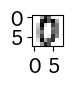

target value : 0


In [33]:
plt.figure(figsize=[0.4,0.4])
plt.imshow(digits.data[0].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()
print('target value : {}'.format(digits.target[0]))

In [29]:
X = digits.data.copy()
X = X.T # 행렬을 전치하여 각 특징 벡터를 열 벡터로 만든다.
X = X - np.mean(X, axis=1).reshape(-1, 1) # 브로드캐스팅을 이용해 평균이 0이 되도록해서 중심을 맞춘다.
sigma = np.dot(X, X.T) #공분산 행렬을 계산한다. 
las, evs = np.linalg.eig(sigma) #  고유값과 고유벡터를 계산한다.
print(len(las))
print(las[:6])
# 처음 고유값 2개를 더한 값이 전체 고유값의 합 중에서 28.5%를 차지하므로 피쳐를 2개만 사용하더라도 
# 전체 데이터의 분산을 28.5% 보존하고 있음을 알 수 있다.
print(sum(las[:2]) / sum(las))

64
[321496.44645596 294037.07339949 254652.03660974 181576.27386432
 124845.64540141 106158.91069579]
0.28509364823699307


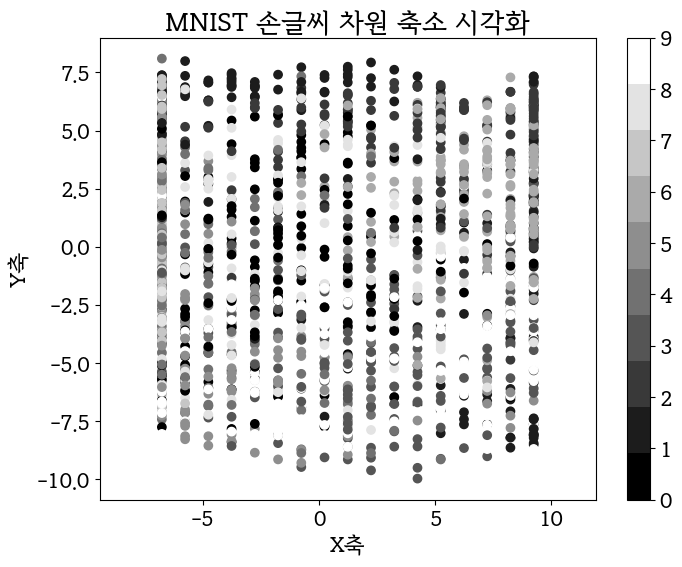

In [48]:
first_components = np.dot(evs[0], X)
second_components = np.dot(evs[1], X)

plt.figure(figsize=[8,6])
plt.scatter(x=first_components, y=second_components, c=digits.target ,cmap=plt.cm.get_cmap('gray', 10))
plt.title('MNIST 손글씨 차원 축소 시각화')
plt.xlabel('X축')
plt.ylabel('Y축')
plt.axis('equal')
plt.colorbar()
plt.show()